## **DSBA 2021 - M1: (Mandatory) Assignment**

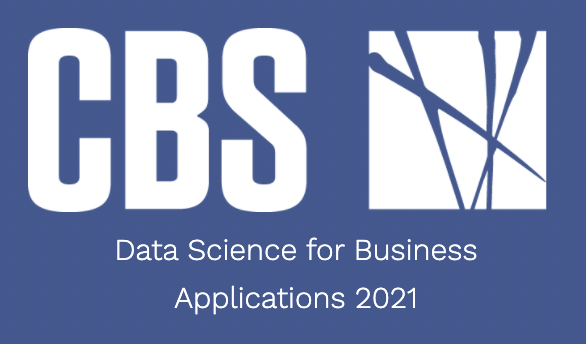

Welcome to the *M1 Assignment notebook*. This project contains data manipulation, exploration, unsupervised and supervised Machine Learning. 

## **Application: the Student Alcohol Consumption dataset**

The dataset was published on Kaggle by *UCI Machine Learning* 5 years ago. 

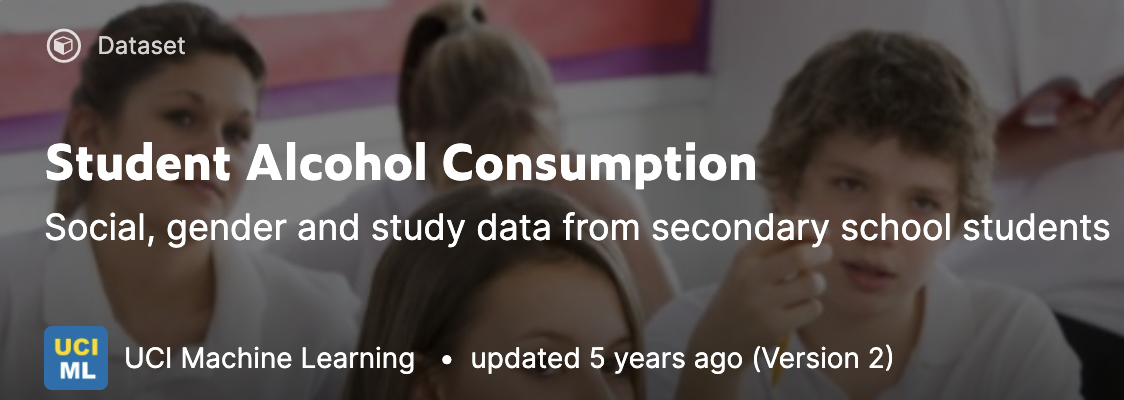



## **Kaggle Description**

**Context:**

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

**Content:**

For all the attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets, look at the datasets page:

https://www.kaggle.com/uciml/student-alcohol-consumption

*Additional note:*

There are several (382) students that belong to both datasets. These students can be identified by searching for identical attributes that characterize each student.

## **Import Libraries and Data**

In [1]:
# Import Libraries

# EDA
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# SML: Classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

# SML: Regression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# UML: Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import altair as alt

In [2]:
# Read CSV files

student_mat = pd.read_csv('/content/student-mat.csv')
student_por = pd.read_csv('/content/student-por.csv')

In [3]:
# Merge the two files

student = pd.concat([student_mat, student_por], ignore_index=True, sort=False)

student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
# Verify data shapes

print(student_mat.shape)
print(student_por.shape)
print(student.shape)

print('Rule of thumb validated: minimum > 500 observations, > 10 features')

(395, 33)
(649, 33)
(1044, 33)
Rule of thumb validated: minimum > 500 observations, > 10 features


In [5]:
# Inspect data

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

## **Clean Data: Duplicates and NaN**

In [6]:
# Spot the duplicates: 382 students

student.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]).sum()

382

In [7]:
# Drop the duplicates

student.drop_duplicates(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep='first', inplace=True, ignore_index=True)
print(student.shape)

(662, 33)


0


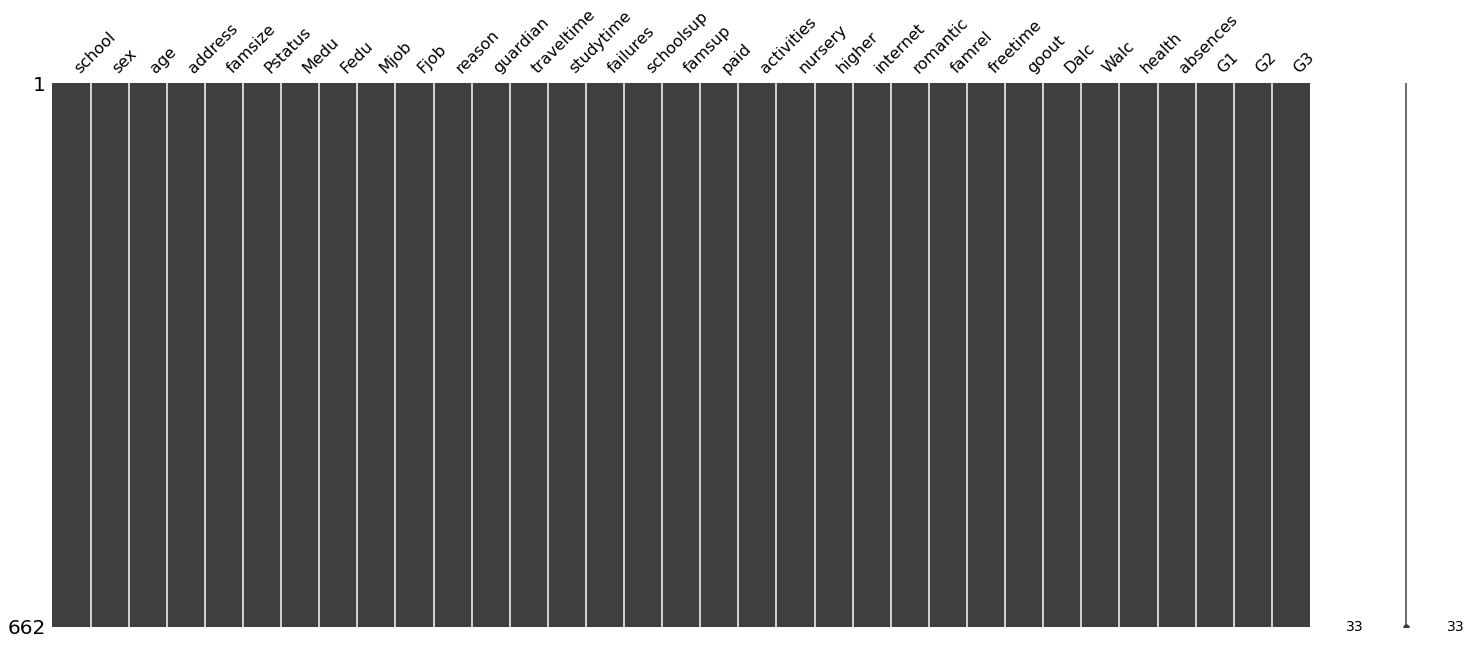

In [8]:
# Check for NaN values

print(student.isnull().sum().sum())

import missingno as msno
msno.matrix(student)

In [9]:
# Encoding variables

student['school'].replace(to_replace=['GP','MS'], value=[0,1],inplace=True)
student['sex'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
student['address'].replace(to_replace=['U','R'], value=[0,1],inplace=True)
student['famsize'].replace(to_replace=['GT3','LE3'], value=[0,1],inplace=True)
student['Pstatus'].replace(to_replace=['A','T'], value=[0,1],inplace=True)
student['schoolsup'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['famsup'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['paid'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['activities'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['nursery'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['higher'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['internet'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
student['romantic'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)

## **Explore the variables: Analysis and Visualization**

In [10]:
# describe all the columns in student data

student.describe(include = "all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662,662,662,662,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,373,288,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.344411,0.589124,16.812689,0.303625,0.303625,0.874622,2.492447,2.293051,NaN,NaN,NaN,NaN,1.564955,1.927492,0.332326,0.105740,0.604230,0.291541,0.481873,0.793051,0.892749,0.761329,0.374622,3.938066,3.184290,3.172205,1.504532,2.282477,3.531722,4.930514,10.728097,10.708459,10.725076
std,0.475535,0.492365,1.269194,0.460170,0.460170,0.331397,1.130958,1.094027,NaN,NaN,NaN,NaN,0.742799,0.827405,0.716024,0.307737,0.489385,0.454816,0.500049,0.405425,0.309666,0.426593,0.484391,0.941930,1.060583,1.161907,0.926567,1.290121,1.434835,6.858060,3.082098,3.529588,4.106738
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000
50%,0.000000,1.000000,17.000000,0.000000,0.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


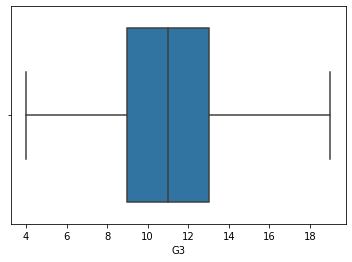

In [11]:
# Plot the student performance (G3)

sns.boxplot(student.G3, showfliers=False)

In [12]:
# Set Performance bins

bins = np.linspace(min(student["G3"]), max(student["G3"]), 4)
grade_levels = ['Low', 'Medium', 'High']

student["G3_binned"] = pd.cut(student["G3"], bins, labels=grade_levels, include_lowest=True )
student[['G3','G3_binned']].head(5)

,G3,G3_binned
0,6,Low
1,6,Low
2,10,Medium
3,15,High
4,10,Medium


In [13]:
# Count the values per bin

student["G3_binned"].value_counts(normalize = True)

Medium    0.648036
High      0.247734
Low       0.104230
Name: G3_binned, dtype: float64

In [14]:
# Retrieve the G3 bins proportion group by Dalc 

student.groupby(['Dalc'])['G3_binned'].value_counts(normalize=True)

Dalc  G3_binned
1     Medium       0.608696
      High         0.289130
      Low          0.102174
2     Medium       0.680328
      High         0.180328
      Low          0.139344
3     Medium       0.822222
      High         0.155556
      Low          0.022222
4     Medium       0.777778
      Low          0.111111
      High         0.111111
5     Medium       0.882353
      Low          0.117647
Name: G3_binned, dtype: float64

In [15]:
# Retrieve the G3 bins proportion group by Walc 

student.groupby(['Walc'])['G3_binned'].value_counts(normalize=True)

Walc  G3_binned
1     Medium       0.588235
      High         0.298039
      Low          0.113725
2     Medium       0.598639
      High         0.285714
      Low          0.115646
3     Medium       0.685484
      High         0.233871
      Low          0.080645
4     Medium       0.788889
      High         0.122222
      Low          0.088889
5     Medium       0.760870
      High         0.130435
      Low          0.108696
Name: G3_binned, dtype: float64

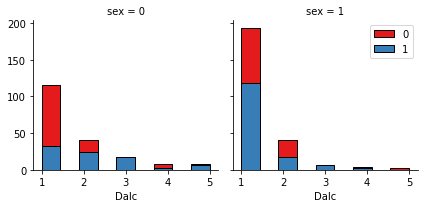

In [16]:
# Relation between workday alcohol consumption (Dalc), sex and school

bins = np.linspace(student.Dalc.min(), student.Dalc.max(), 10)
g = sns.FacetGrid(student, col="sex", hue="school", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Dalc', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

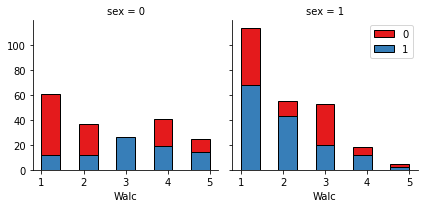

In [17]:
# Relation between weekend alcohol consumption (Walc), sex and school

bins = np.linspace(student.Walc.min(), student.Walc.max(), 10)
g = sns.FacetGrid(student, col="sex", hue="school", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Walc', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## **Supervised Machine Learning: Classification**

We will use Logistic Regression to categorize unknown items with binary data.

> *Can we categorize the final grades of students with binary data?*

In [18]:
# Define the variables

X = student[['school','sex','age', 'address', 'famsize', 'Pstatus', 'Medu','Fedu','traveltime', 'studytime', 'failures',
             'schoolsup', 'famsup', 'paid', 'activities', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
             'nursery', 'higher', 'internet', 'romantic', 'absences']]
y = student['G3_binned']

In [19]:
# Standardized and labelled variables

scaler = StandardScaler()
X = scaler.fit_transform(X)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [20]:
# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Fit a simple logistic model

model = LogisticRegression(multi_class="ovr") # since we have 3 bins
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Prediction and Accuracy of the model

yhat = model.predict(X_test)
yhat_prob = model.predict_proba(X_test)

print("Model's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Model's Log Loss: %.4f" % log_loss(y_test, yhat_prob))

Model's Accuracy:  0.7218045112781954
Model's Log Loss: 0.7121


In [23]:
# Model Evaluation

true_bin = labelencoder_y.inverse_transform(y_test)
predicted_bin = labelencoder_y.inverse_transform(model.predict(X_test))

print(classification_report(true_bin,predicted_bin, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

        High       0.67      0.43      0.52        28
         Low       0.00      0.00      0.00        15
      Medium       0.74      0.93      0.82        90

    accuracy                           0.72       133
   macro avg       0.47      0.45      0.45       133
weighted avg       0.64      0.72      0.67       133



## **Supervised Machine Learning: Regression**

We will use three Linear Regression models to predict a continuous variable.

> *Can we predict the final performance of students with multiple variables?*


In [24]:
# Look at variables correlation

student.corr(method ='kendall')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,0.069007,0.089322,0.344108,0.033001,0.015226,-0.223410,-0.182388,0.270534,-0.137011,0.041864,-0.125180,-0.069977,-0.262107,-0.088224,0.001446,-0.128901,-0.242993,0.069527,0.014598,0.039248,0.039372,0.063076,0.032574,-0.036043,-0.208827,-0.084856,-0.075287,-0.065578
sex,0.069007,1.000000,0.046439,0.017268,-0.089567,-0.065855,-0.087744,-0.072890,-0.036943,0.234754,-0.036876,0.107448,0.127772,0.022288,-0.116322,0.043275,0.067748,-0.049832,0.126214,-0.065970,-0.158836,-0.056140,-0.279222,-0.277067,-0.127390,-0.047241,-0.023286,-0.023952,-0.014211
age,0.089322,0.046439,1.000000,0.022146,0.015368,-0.009776,-0.093747,-0.100655,0.039904,0.025285,0.249695,-0.164203,-0.091987,-0.046744,-0.066084,-0.039947,-0.211323,0.004972,0.164228,-0.012157,-0.009957,0.092229,0.063180,0.062835,-0.019963,0.128547,-0.082489,-0.108616,-0.100719
address,0.344108,0.017268,0.022146,1.000000,-0.057360,0.081357,-0.173905,-0.126713,0.323650,-0.062232,0.069285,-0.013394,-0.016460,-0.127218,0.007518,-0.011380,-0.068399,-0.185169,0.031905,0.029084,0.032321,-0.020800,0.060479,0.024019,0.010102,-0.079561,-0.049529,-0.063381,-0.065691
famsize,0.033001,-0.089567,0.015368,-0.057360,1.000000,-0.236098,-0.031462,-0.042284,0.020772,-0.014652,-0.044587,-0.056127,-0.050049,-0.040477,-0.012206,0.094038,0.005918,-0.007916,-0.029178,0.007838,-0.012941,0.000938,0.085410,0.083547,0.016203,0.029528,0.048601,0.051858,0.054780
Pstatus,0.015226,-0.065855,-0.009776,0.081357,-0.236098,1.000000,-0.052096,-0.032918,0.038397,-0.026599,-0.011095,-0.003316,0.010737,0.072247,0.109510,-0.047030,0.016189,0.076946,-0.046239,0.016905,0.031556,0.016128,0.052422,0.054967,-0.006947,-0.102737,-0.008363,-0.000837,-0.011345
Medu,-0.223410,-0.087744,-0.093747,-0.173905,-0.031462,-0.052096,1.000000,0.558045,-0.204450,0.090413,-0.170880,-0.019080,0.122293,0.220433,0.103934,0.119168,0.201208,0.236623,-0.026304,0.011930,-0.015465,0.018581,-0.013780,-0.030539,0.006768,0.061212,0.156893,0.167596,0.151645
Fedu,-0.182388,-0.072890,-0.100655,-0.126713,-0.042284,-0.032918,0.558045,1.000000,-0.178692,0.053566,-0.148357,0.021875,0.123098,0.162988,0.070212,0.082857,0.185443,0.164893,-0.069589,0.015909,0.002610,0.044774,-0.015473,0.019199,0.031037,0.037540,0.143492,0.141180,0.119840
traveltime,0.270534,-0.036943,0.039904,0.323650,0.020772,0.038397,-0.204450,-0.178692,1.000000,-0.084756,0.070738,-0.057976,-0.039152,-0.121452,-0.025250,-0.014898,-0.095905,-0.168409,0.015361,-0.022145,-0.009426,0.020198,0.054963,0.029717,-0.050899,-0.050590,-0.061016,-0.082977,-0.065799
studytime,-0.137011,0.234754,0.025285,-0.062232,-0.014652,-0.026599,0.090413,0.053566,-0.084756,1.000000,-0.115261,0.089234,0.135890,0.176266,0.052065,0.032975,0.196328,0.044452,0.071249,0.022956,-0.072131,-0.075291,-0.156461,-0.198442,-0.061113,-0.026183,0.137002,0.103403,0.095637


In [25]:
# Set target field

y = student['G3']

In [26]:
# Set, encoding and standardize variables

X = student[['Medu', 'Fedu', 'higher', 'G1', 'G2']]
X = pd.get_dummies(X)
X = StandardScaler().fit_transform(X)

In [27]:
# Create train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
# Initiate models

model_ols = LinearRegression()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

In [29]:
# Fit models with train data

model_ols.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

[14:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [30]:
# Performance score on test data

print("OLS score: %.4f" % model_ols.score(X_test, y_test))
print("RF score: %.4f" % model_rf.score(X_test, y_test))
print("XGB score: %.4f" % model_xgb.score(X_test, y_test))

OLS score: 0.8714
RF score: 0.7938
XGB score: 0.8385


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 20.860959753611603)

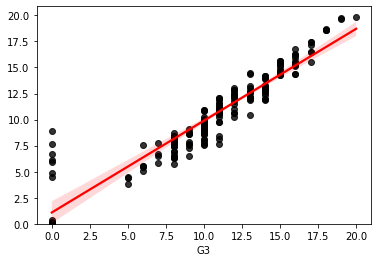

In [31]:
# Plot the predictions of one the most efficient model: OLS

y_pred_ols = model_ols.predict(X_test)
sns.regplot(y_test, y_pred_ols, data = student,
           scatter_kws = {"color" : "black"}, line_kws = {"color" : "red"})
plt.ylim(0,)

## **Unsupervised Machine Learning: Clustering**

We will use K-Means Clustering to divide data into non-overlapping subsets based on all the data.

> *Can we segment the data into three specific clusters?*



In [32]:
# Set scaled data

X = pd.concat([student.iloc[:,0:8], student.iloc[:,12:33]], axis = 1)
X = StandardScaler().fit_transform(X)

In [33]:
# Use PCA to transform the data

pca = PCA(n_components=2) # we explicitly ask for 2 components
pca_data = pca.fit_transform(X)
pca_data.shape # 662 rows, 2 columns - just as we wanted

(662, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


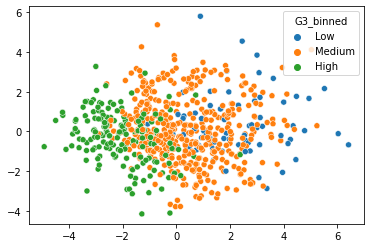

In [34]:
sns.scatterplot(pca_data[:,0], pca_data[:,1], hue = student['G3_binned'] )

In [35]:
# Instantiate KMeans to create 3 clusters

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


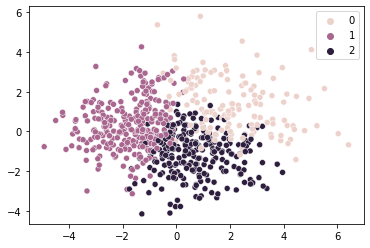

In [36]:
# Let's see how well the clusters fit with the performance bins

sns.scatterplot(pca_data[:,0], pca_data[:, 1], hue = k_means.labels_)

In [37]:
# Visualize the clusters with Altair

vis_data = pd.DataFrame(pca_data)
vis_data['cluster'] = labels
vis_data['G3_binned'] = student['G3_binned']
vis_data.columns = ['x', 'y', 'cluster', 'G3_binned']

alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='cluster',
    tooltip=['G3_binned']
).interactive()

alt.Chart(...)

In [38]:
# Inspect the clusters

print(student.loc[k_means.labels_ == 0, student.columns[25:33]].describe())
print(student.loc[k_means.labels_ == 1, student.columns[25:33]].describe())
print(student.loc[k_means.labels_ == 2, student.columns[25:33]].describe())

            goout        Dalc        Walc  ...          G1          G2          G3
count  140.000000  140.000000  140.000000  ...  140.000000  140.000000  140.000000
mean     3.885714    2.507143    3.678571  ...    8.642857    8.335714    8.292857
std      1.080139    1.249440    1.081352  ...    2.231467    3.143134    3.643258
min      1.000000    1.000000    1.000000  ...    3.000000    0.000000    0.000000
25%      3.000000    2.000000    3.000000  ...    7.000000    7.000000    8.000000
50%      4.000000    2.000000    4.000000  ...    9.000000    9.000000    9.000000
75%      5.000000    3.000000    4.000000  ...   10.000000   10.000000   10.000000
max      5.000000    5.000000    5.000000  ...   16.000000   16.000000   16.000000

[8 rows x 8 columns]
            goout        Dalc        Walc  ...          G1          G2          G3
count  264.000000  264.000000  264.000000  ...  264.000000  264.000000  264.000000
mean     3.132576    1.325758    2.128788  ...   13.075758   13.3

## **Observations and Conclusion**

**Analysis and Visualization:**

*   The majority of grades (> 60%) are part of the medium bin.

*   We can see that workday alcohol consumption (Dalc) seems to have a significant negative impact on student final grade. However, the effect of weekend alcohol consumption is more nuanced, specially for moderate levels.

*   Students consume more alcohol during the weekend which is reassuring. The alcohol consumption is clearly higher for men and also slightly more significant for Mousinho da Silveira school.

**Classification:**

*   We used Logistic Regression to classify final performance with the target field G3_binned. The model presents a modest performance with an average score of 72%. 

*   Looking at the classification report, we can see that the model performs well on medium bin but not on High and Low bins.

*   This performance may be due to the dataset size which doesn't allow the model to fit well with small bins.






**Regression:**

*   We defined with the .corr() method the top 5 variables positively correlated with G3 performance. Then we used these variables to predict this target field. 

*   From the three models used, OLS is the most performant with an average score of 87% on test data. 

*   The Regplot shows that the model is more performant for predicting high grades.

**Clustering:**

*   The first cluster with the highest goout and alcohol consumption rates presents the lowest performance grades (< 9).

*   The third cluster with the lowest goout and alcohol consumption rates also presents low performance grades (< 10).

*   The second cluster which have slightly higher goout and alcohol consumption rates than the third cluster presents the highest performance grades (> 13).